## Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
df = pd.read_csv('cleaned_data.csv')
df.head(2)

,patient_id,date_of_admission,amount,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,...,lab_result_2,lab_result_3,weight,height,lth_of_stay,gender,race,resident_status,date_of_birth,age
0,00225710a878eff524a1d13be817e8e2,2014-04-10,5190.6,2014-04-22,0,0.0,0,0,0.0,0,...,27.9,96.0,66.9,155.0,12.0,Female,Chinese,Singaporean,1983-01-16,31
1,0029d90eb654699c18001c17efb0f129,2012-11-07,22601.5,2012-11-20,0,1.0,0,0,0.0,1,...,26.5,109.0,89.1,160.0,13.0,Female,Chinese,Singaporean,1943-10-14,69


<AxesSubplot:xlabel='age', ylabel='Count'>

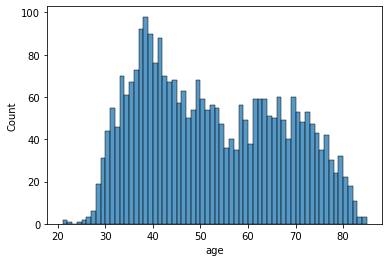

In [79]:
# age distribution

sns.histplot(data=df, x="age", bins=np.arange(df.age.min(), df.age.max() + 1))

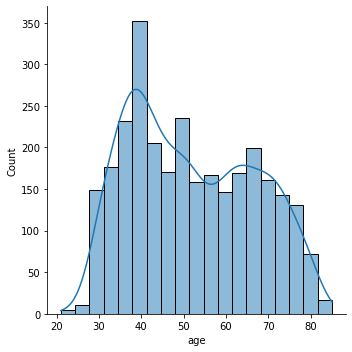

In [166]:
sns.displot(df['age'], kde=True)
#ax.figure.savefig('age.png') 
plt.savefig("age.png")

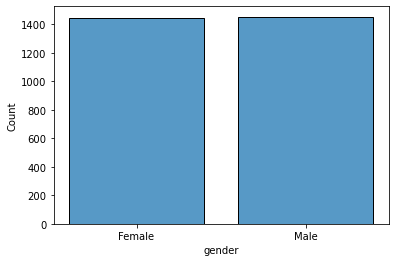

In [101]:
# gender distribution

ax = sns.histplot(data=df, x="gender", shrink=.8)
ax.figure.savefig('gender.png') 

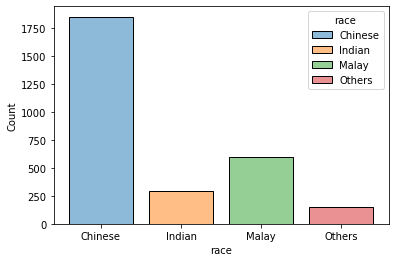

In [95]:
# race distribution

ax = sns.histplot(data=df, x="race", shrink=.8, hue="race")
ax.figure.savefig('race.png') 

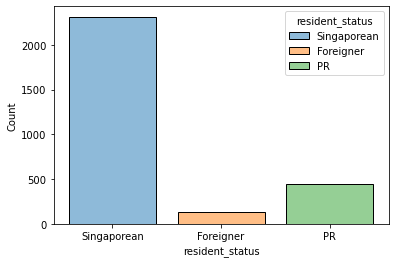

In [105]:
# resident status dist

ax = sns.histplot(data=df, x="resident_status", shrink=.8, hue="resident_status")
ax.figure.savefig('resident.png') 

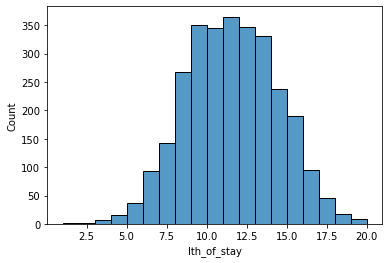

In [170]:
# length of stay distribution

ax = sns.histplot(data=df, x="lth_of_stay", bins=np.arange(df.lth_of_stay.min(), df.lth_of_stay.max() + 1))
ax.figure.savefig('stay.png') 

<AxesSubplot:xlabel='age', ylabel='lth_of_stay'>

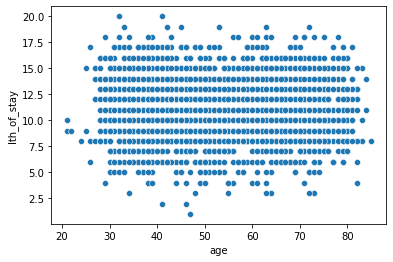

In [18]:
# length of stay and age 

sns.scatterplot(data=df, x="age", y="lth_of_stay")

<AxesSubplot:xlabel='age', ylabel='amount'>

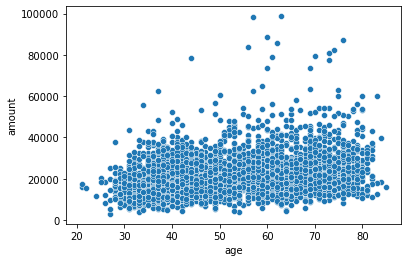

In [19]:
sns.scatterplot(data=df, x="age", y="amount")

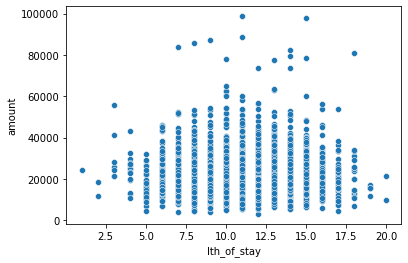

In [172]:
sns.scatterplot(data=df, x="lth_of_stay", y="amount")
plt.savefig("stay_cost.png", bbox_inches='tight')

<AxesSubplot:xlabel='lth_of_stay', ylabel='amount'>

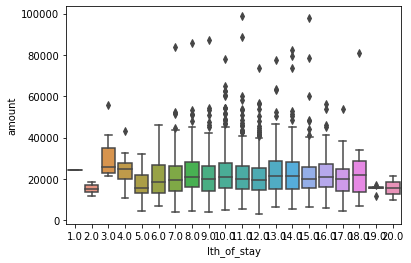

In [107]:
sns.boxplot(data=df, x="lth_of_stay", y="amount")

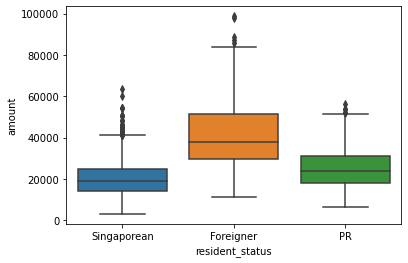

In [168]:
sns.boxplot(data=df, x="resident_status", y="amount")
plt.savefig("resident_cost.png", bbox_inches='tight')

<AxesSubplot:xlabel='gender', ylabel='amount'>

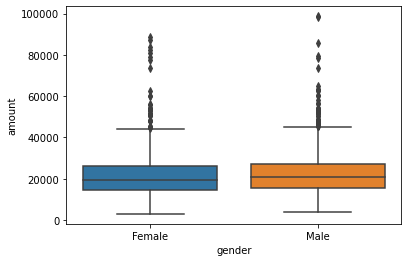

In [22]:
sns.boxplot(data=df, x="gender", y="amount")

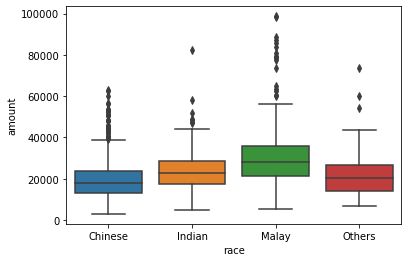

In [183]:
sns.boxplot(data=df, x="race", y="amount")
plt.savefig("race_cost.png", bbox_inches='tight')

In [35]:
# check whether there's statistical difference in mean for resident_status against amount

import statsmodels.api as sm
from statsmodels.formula.api import ols
df2=df[['amount', 'resident_status']]
df2.amount=np.log10(df2[['amount']])

mod = ols('amount ~ resident_status', data=df2).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for residents')
print('----------------------')
print(aov_table)
print()

        amount resident_status
0     3.715218     Singaporean
1     4.354137     Singaporean
2     4.241726     Singaporean
3     4.184291     Singaporean
4     4.866157       Foreigner
...        ...             ...
2893  3.669884     Singaporean
2894  4.147645     Singaporean
2895  4.477897              PR
2896  4.447276     Singaporean
2897  4.323060     Singaporean

[2898 rows x 2 columns]
ANOVA table for residents
----------------------
                    sum_sq      df           F        PR(>F)
resident_status  15.177789     2.0  231.019484  8.211808e-94
Residual         95.099552  2895.0         NaN           NaN



C:\Users\thous\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
# check whether there's statistical difference in mean for race against amount

import statsmodels.api as sm
from statsmodels.formula.api import ols
df2=df[['amount', 'race']]
df2.amount=np.log10(df2[['amount']])

mod = ols('amount ~ race', data=df2).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for race')
print('----------------------')
print(aov_table)
print()

ANOVA table for race
----------------------
             sum_sq      df           F         PR(>F)
race      18.010069     3.0  188.297684  1.536095e-111
Residual  92.267271  2894.0         NaN            NaN



C:\Users\thous\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='medical_history_1', ylabel='amount'>

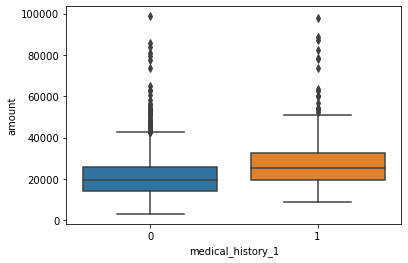

In [39]:
sns.boxplot(data=df, x="medical_history_1", y="amount")

In [176]:
df2=df[['amount', 'medical_history_1']]
df2.amount=np.log10(df2[['amount']])

mod = ols('amount ~ medical_history_1', data=df2).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for med_history')
print('----------------------')
print(aov_table)
print()

ANOVA table for med_history
----------------------
                       sum_sq      df           F        PR(>F)
medical_history_1    6.342971     1.0  176.738875  3.434324e-39
Residual           103.934370  2896.0         NaN           NaN



C:\Users\thous\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='medical_history_2', ylabel='amount'>

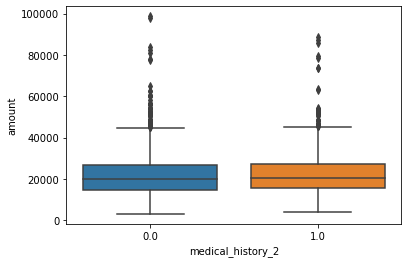

In [40]:
sns.boxplot(data=df, x="medical_history_2", y="amount")

<AxesSubplot:xlabel='medical_history_3', ylabel='amount'>

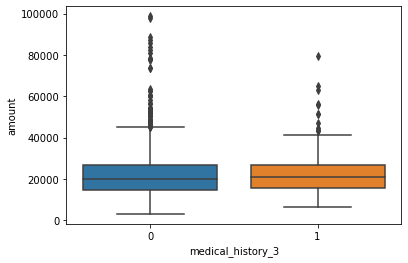

In [41]:
sns.boxplot(data=df, x="medical_history_3", y="amount")

<AxesSubplot:xlabel='medical_history_4', ylabel='amount'>

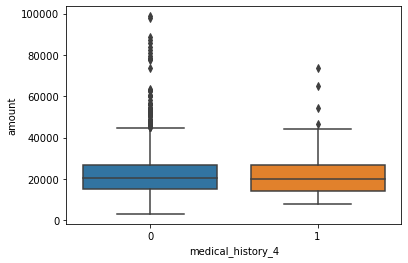

In [42]:
sns.boxplot(data=df, x="medical_history_4", y="amount")

<AxesSubplot:xlabel='medical_history_5', ylabel='amount'>

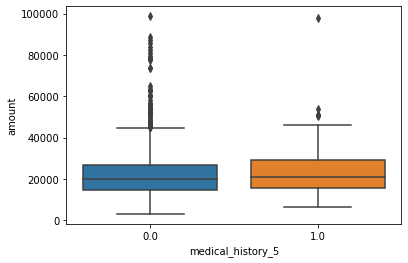

In [43]:
sns.boxplot(data=df, x="medical_history_5", y="amount")

<AxesSubplot:xlabel='medical_history_6', ylabel='amount'>

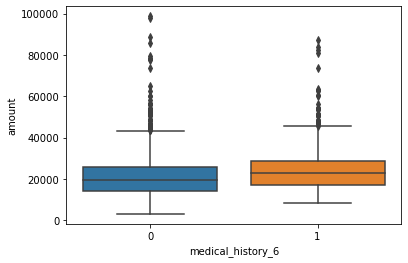

In [44]:
sns.boxplot(data=df, x="medical_history_6", y="amount")

<AxesSubplot:xlabel='medical_history_7', ylabel='amount'>

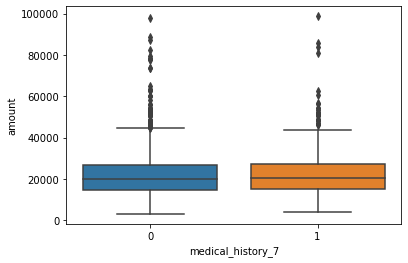

In [45]:
sns.boxplot(data=df, x="medical_history_7", y="amount")

<AxesSubplot:xlabel='preop_medication_1', ylabel='amount'>

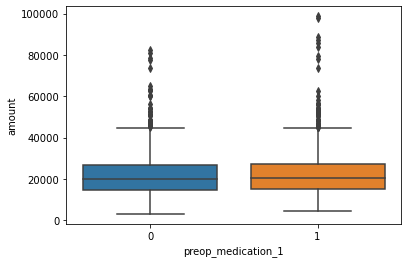

In [46]:
sns.boxplot(data=df, x="preop_medication_1", y="amount")

<AxesSubplot:xlabel='preop_medication_2', ylabel='amount'>

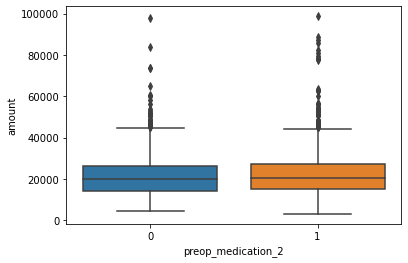

In [47]:
sns.boxplot(data=df, x="preop_medication_2", y="amount")

<AxesSubplot:xlabel='preop_medication_3', ylabel='amount'>

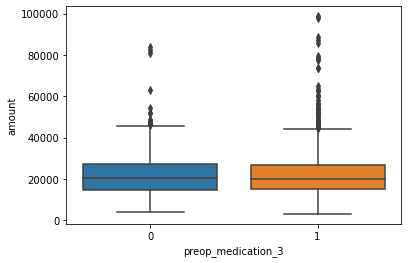

In [48]:
sns.boxplot(data=df, x="preop_medication_3", y="amount")

<AxesSubplot:xlabel='preop_medication_4', ylabel='amount'>

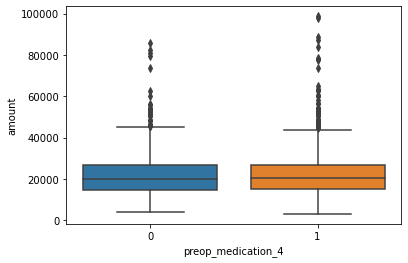

In [49]:
sns.boxplot(data=df, x="preop_medication_4", y="amount")

<AxesSubplot:xlabel='preop_medication_5', ylabel='amount'>

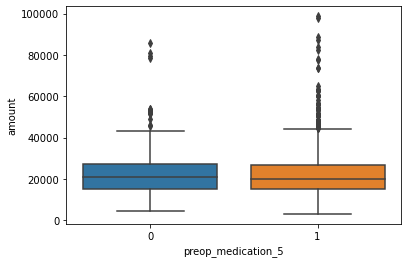

In [50]:
sns.boxplot(data=df, x="preop_medication_5", y="amount")

<AxesSubplot:xlabel='preop_medication_6', ylabel='amount'>

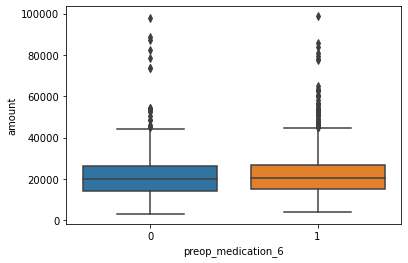

In [51]:
sns.boxplot(data=df, x="preop_medication_6", y="amount")

In [137]:
df2=df[['amount', 'preop_medication_6']]
df2.amount=np.log10(df2[['amount']])

mod = ols('amount ~ preop_medication_6', data=df2).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for preop_medication_6')
print('----------------------')
print(aov_table)
print()

ANOVA table for preop_medication_6
----------------------
                        sum_sq      df         F    PR(>F)
preop_medication_6    0.161317     1.0  4.242555  0.039512
Residual            110.116024  2896.0       NaN       NaN



C:\Users\thous\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='lab_result_1', ylabel='amount'>

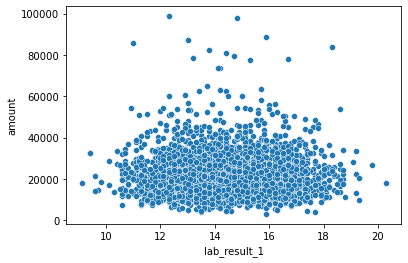

In [53]:
sns.scatterplot(data=df, x="lab_result_1", y="amount")

<AxesSubplot:xlabel='lab_result_2', ylabel='amount'>

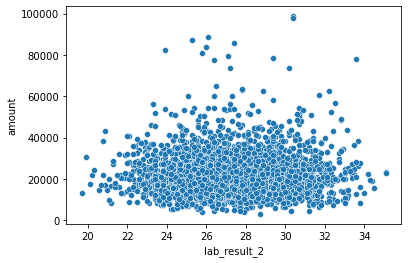

In [55]:
sns.scatterplot(data=df, x="lab_result_2", y="amount")

<AxesSubplot:xlabel='lab_result_3', ylabel='amount'>

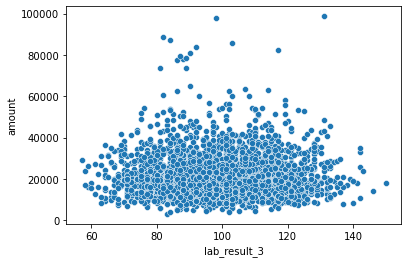

In [56]:
sns.scatterplot(data=df, x="lab_result_3", y="amount")

<AxesSubplot:xlabel='weight', ylabel='amount'>

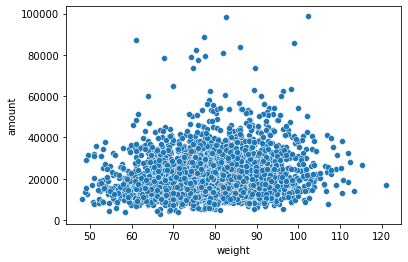

In [57]:
sns.scatterplot(data=df, x="weight", y="amount")

<AxesSubplot:xlabel='symptom_1', ylabel='amount'>

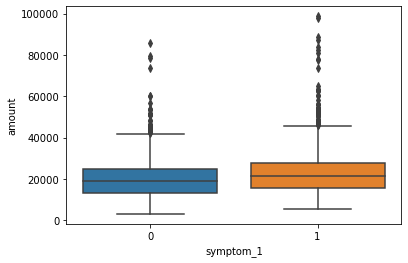

In [58]:
sns.boxplot(data=df, x="symptom_1", y="amount")

<AxesSubplot:xlabel='symptom_2', ylabel='amount'>

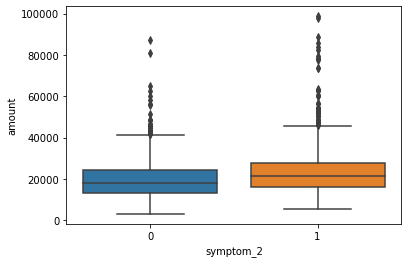

In [59]:
sns.boxplot(data=df, x="symptom_2", y="amount")

<AxesSubplot:xlabel='symptom_3', ylabel='amount'>

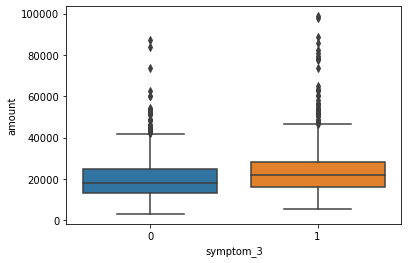

In [60]:
sns.boxplot(data=df, x="symptom_3", y="amount")

<AxesSubplot:xlabel='symptom_4', ylabel='amount'>

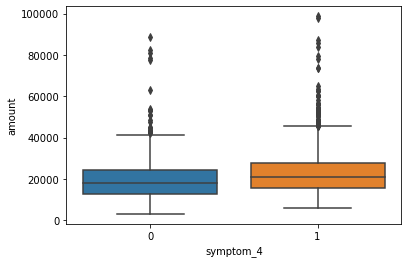

In [61]:
sns.boxplot(data=df, x="symptom_4", y="amount")

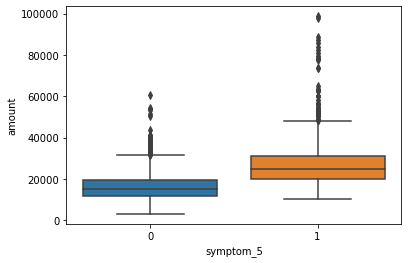

In [173]:
sns.boxplot(data=df, x="symptom_5", y="amount")
plt.savefig("sympt5_cost.png", bbox_inches='tight')

In [138]:
df2=df[['amount', 'symptom_5']]
df2.amount=np.log10(df2[['amount']])

mod = ols('amount ~ symptom_5', data=df2).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for symptom_5')
print('----------------------')
print(aov_table)
print()

ANOVA table for symptom_5
----------------------
              sum_sq      df            F         PR(>F)
symptom_5  36.795492     1.0  1450.150545  1.311176e-257
Residual   73.481849  2896.0          NaN            NaN



C:\Users\thous\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:>

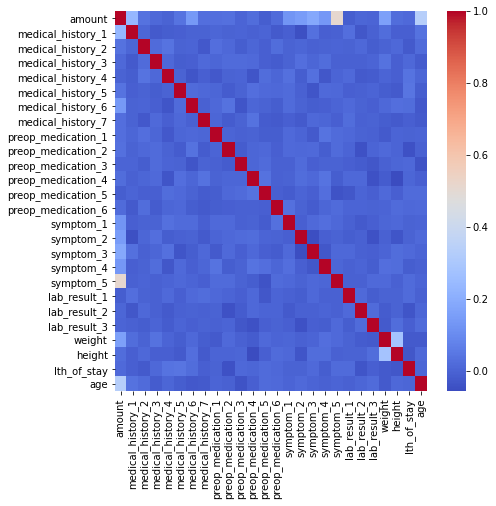

In [70]:
df_matrix = df.corr()
fig, ax = plt.subplots(figsize=(7,7))        

sns.heatmap(df_matrix, cmap="coolwarm", ax=ax)

In [132]:
# check the total amount of bill (based on date of discharge) over the years; year 2016 removed as data not for full year

df_year = df[["date_of_discharge", "amount"]]
df_year['date_of_discharge'].values.astype('datetime64[Y]')
df_year['date_of_discharge'] =  pd.DatetimeIndex(df_year['date_of_discharge']).year
#df_year[df_year["date_of_discharge"] != '2016']
delete_row = df_year[df_year["date_of_discharge"]==2016].index
df_year = df_year.drop(delete_row)

df_year.head()

<ipython-input-132-40ddf827536f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['date_of_discharge'] =  pd.DatetimeIndex(df_year['date_of_discharge']).year


,date_of_discharge,amount
0,2014,5190.6
1,2012,22601.5
2,2013,17447.2
3,2014,15285.9
4,2012,73477.9


<AxesSubplot:xlabel='date_of_discharge', ylabel='amount'>

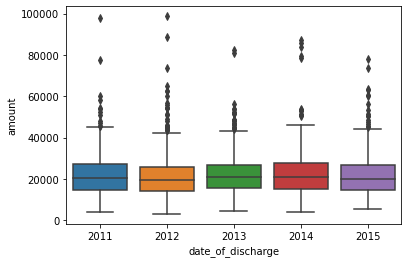

In [180]:
sns.boxplot(data=df_year, x="date_of_discharge", y="amount")

<AxesSubplot:xlabel='race', ylabel='amount'>

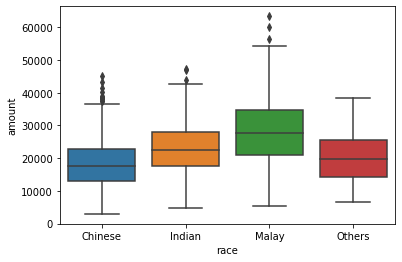

In [141]:
# remove foreigners from race to look at amount of bill for locals and PR only

df2 = df[["race", "amount", "resident_status"]]
df2 = df2[~(df2['resident_status'].str.contains("Foreigner"))]
sns.boxplot(data=df2, x="race", y="amount")

In [142]:
df3=df2[['amount', 'race']]
df3.amount=np.log10(df3[['amount']])

mod = ols('amount ~ race', data=df3).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table for race')
print('----------------------')
print(aov_table)
print()

ANOVA table for race
----------------------
             sum_sq      df          F         PR(>F)
race      17.134352     3.0  205.90085  1.689800e-120
Residual  76.448240  2756.0        NaN            NaN



C:\Users\thous\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [144]:
df3 = df[["race", "amount", "resident_status", "medical_history_1", "symptom_5", "lth_of_stay"]]
df3 = df3[~(df3['resident_status'].str.contains("Foreigner"))]
df3.head()

,race,amount,resident_status,medical_history_1,symptom_5,lth_of_stay
0,Chinese,5190.6,Singaporean,0,0,12.0
1,Chinese,22601.5,Singaporean,0,1,13.0
2,Indian,17447.2,Singaporean,0,1,12.0
3,Chinese,15285.9,Singaporean,1,0,5.0
6,Malay,21499.0,Singaporean,0,0,11.0


<AxesSubplot:xlabel='medical_history_1', ylabel='amount'>

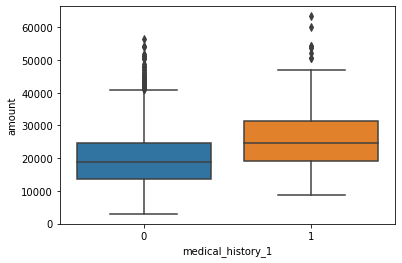

In [146]:
sns.boxplot(data=df3, x="medical_history_1", y="amount")

<AxesSubplot:xlabel='symptom_5', ylabel='amount'>

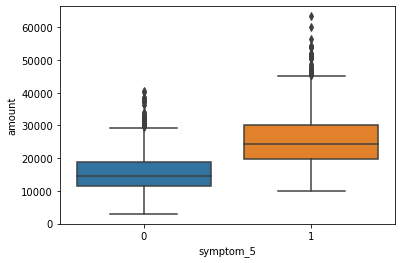

In [147]:
sns.boxplot(data=df3, x="symptom_5", y="amount")

<AxesSubplot:xlabel='lth_of_stay', ylabel='amount'>

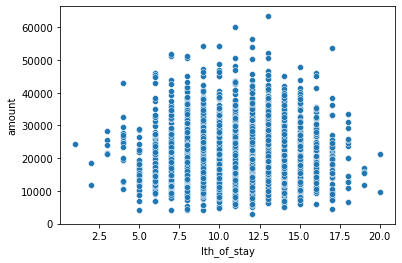

In [148]:
sns.scatterplot(data=df3, x="lth_of_stay", y="amount")

In [161]:
# add number of meds taken during each stay and see the result with amount

df4 = df[["preop_medication_1", "preop_medication_2", "preop_medication_3","preop_medication_4","preop_medication_5","preop_medication_6", "amount"]]

#df4["meds"] = df4.sum(axis=1)

col_list = list(df4[["preop_medication_1", "preop_medication_2", "preop_medication_3","preop_medication_4","preop_medication_5","preop_medication_6"]])

df4['meds'] = df4[col_list].sum(axis=1)

df4

<ipython-input-161-3fb31d5fa66a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['meds'] = df4[col_list].sum(axis=1)


,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,amount,meds
0,0,0,0,1,0,0,5190.6,1
1,0,0,0,0,1,0,22601.5,1
2,0,0,1,1,1,0,17447.2,3
3,0,0,1,1,1,0,15285.9,3
4,1,0,1,1,1,0,73477.9,4
...,...,...,...,...,...,...,...,...
2893,0,0,1,0,1,0,4676.1,2
2894,1,1,1,1,1,1,14049.0,6
2895,1,1,1,1,1,1,30053.6,6
2896,1,1,1,1,1,0,28007.6,5


<AxesSubplot:xlabel='meds', ylabel='amount'>

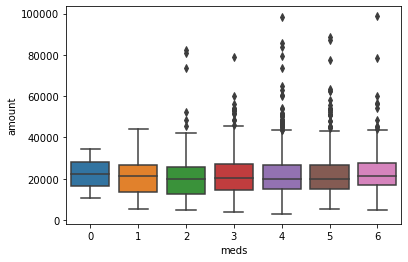

In [162]:
sns.boxplot(data=df4, x="meds", y="amount")

In [174]:
df4 = df[["medical_history_1", "medical_history_2", "medical_history_3","medical_history_4","medical_history_5","medical_history_6", "medical_history_7", "amount"]]

#df4["meds"] = df4.sum(axis=1)

col_list = list(df4[["medical_history_1", "medical_history_2", "medical_history_3","medical_history_4","medical_history_5","medical_history_6", "medical_history_7"]])

df4['medical_history_all'] = df4[col_list].sum(axis=1)

df4

<ipython-input-174-356044d557b7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['medical_history_all'] = df4[col_list].sum(axis=1)


,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,amount,medical_history_all
0,0,0.0,0,0,0.0,0,1,5190.6,1.0
1,0,1.0,0,0,0.0,1,0,22601.5,2.0
2,0,1.0,0,0,0.0,0,1,17447.2,2.0
3,1,0.0,0,0,0.0,0,0,15285.9,1.0
4,0,1.0,0,0,0.0,1,0,73477.9,2.0
...,...,...,...,...,...,...,...,...,...
2893,0,1.0,0,0,0.0,0,1,4676.1,2.0
2894,0,0.0,0,0,0.0,0,0,14049.0,0.0
2895,0,1.0,0,0,1.0,0,0,30053.6,2.0
2896,0,0.0,0,0,0.0,0,0,28007.6,0.0


<AxesSubplot:xlabel='medical_history_all', ylabel='amount'>

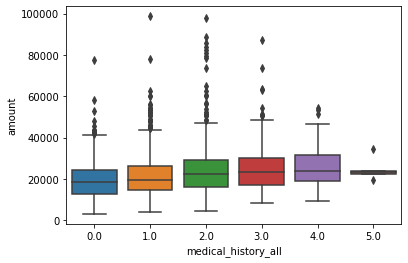

In [175]:
sns.boxplot(data=df4, x='medical_history_all', y="amount")

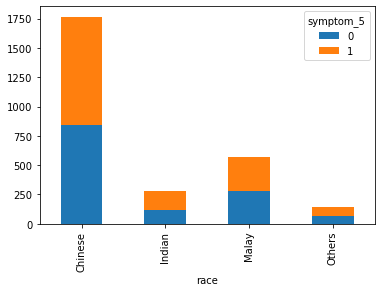

In [193]:
pd.crosstab(df3['race'], df3['symptom_5']).plot(kind='bar', stacked=True)
plt.savefig("race_symptom.png", bbox_inches='tight')